In [1]:
#Import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
forestfire=pd.read_csv("forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forestfire.shape

(517, 31)

In [4]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forestfire[forestfire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
forestfire1= forestfire.drop_duplicates()

In [7]:
forestfire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## Dropping onehot encoded columns

In [8]:
forestfire2=forestfire1.drop(forestfire1.columns[11:30],axis=1)

In [9]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
Label encoding

In [10]:
forestfire2["month"]=label.fit_transform(forestfire2["month"])
forestfire2["day"]=label.fit_transform(forestfire2["day"])
forestfire2["size_category"]=label.fit_transform(forestfire2["size_category"])

In [11]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [ ]:
Visualization for identifying whether the data is normally distributed or not

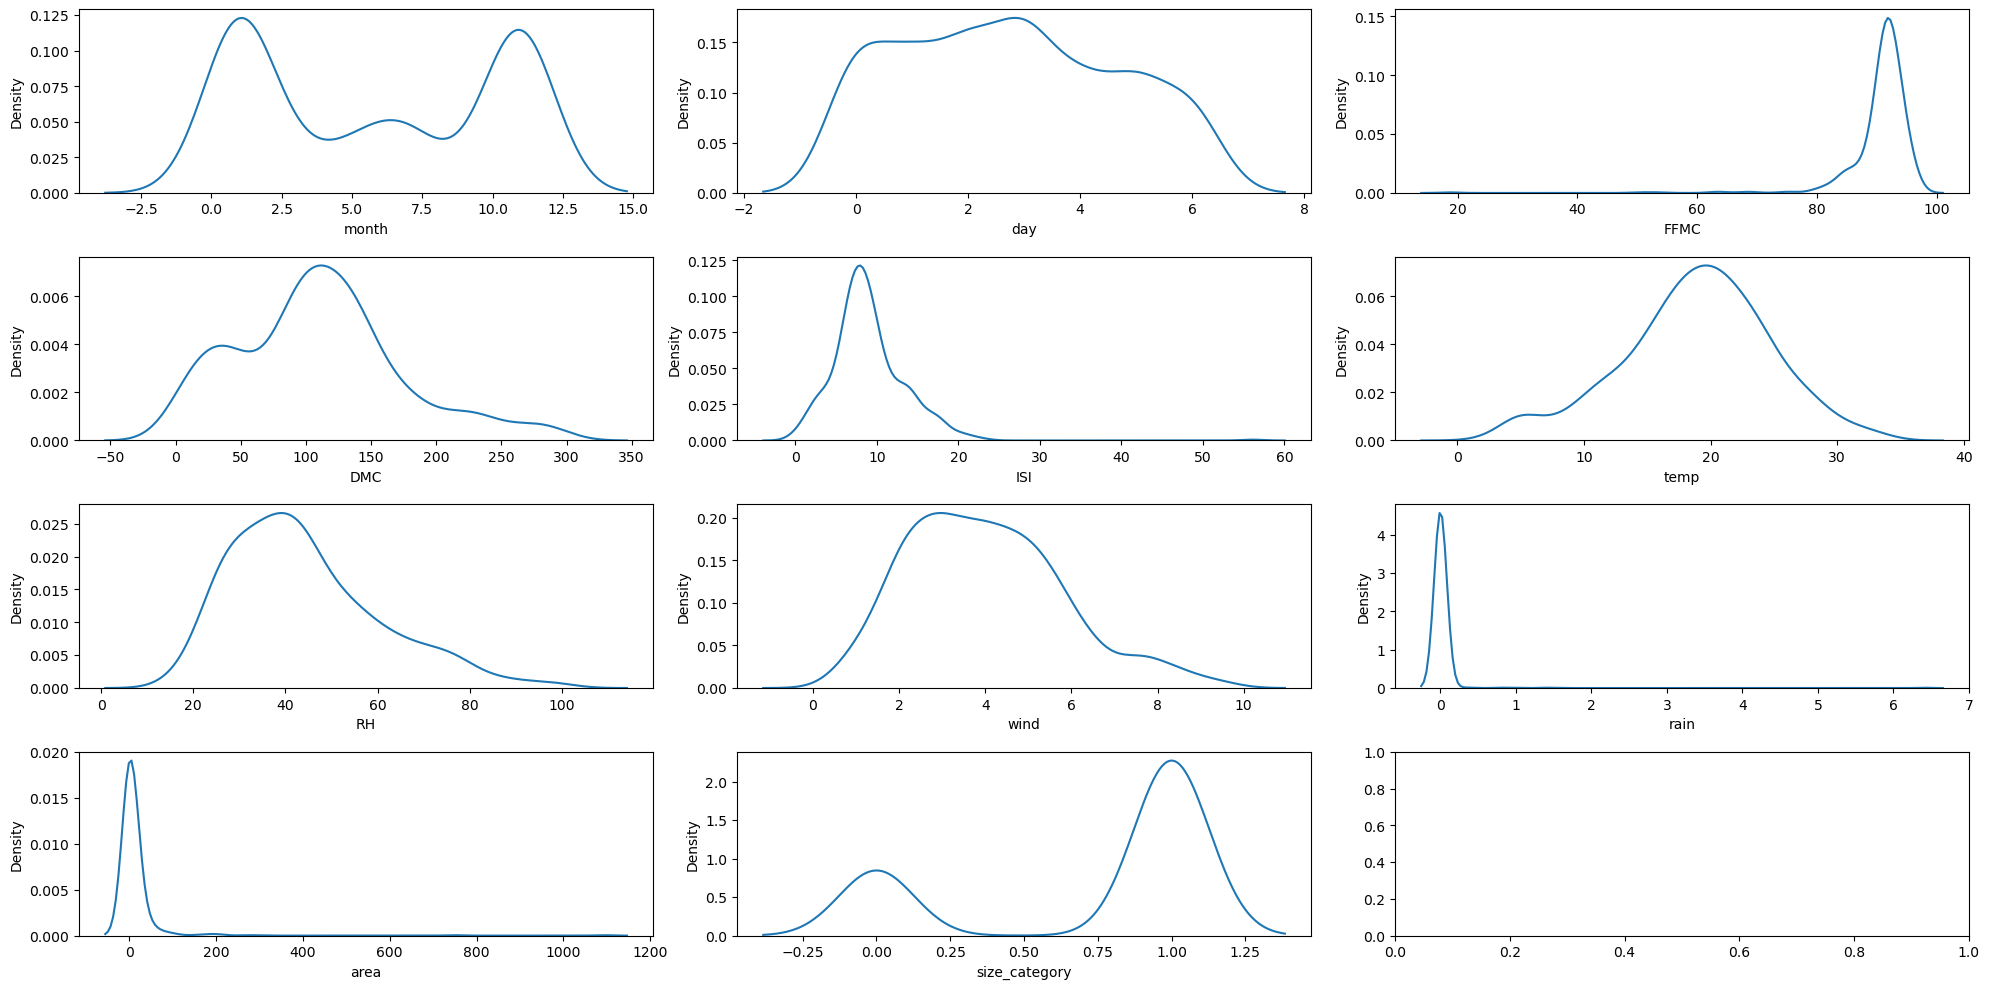

In [12]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.kdeplot(forestfire2.month,ax=ax[0,0])
sns.kdeplot(forestfire2.day,ax=ax[0,1])
sns.kdeplot(forestfire2.FFMC,ax=ax[0,2])
sns.kdeplot(forestfire2.DMC,ax=ax[1,0])
sns.kdeplot(forestfire2.ISI,ax=ax[1,1])
sns.kdeplot(forestfire2.temp,ax=ax[1,2])
sns.kdeplot(forestfire2.RH,ax=ax[2,0])
sns.kdeplot(forestfire2.wind,ax=ax[2,1])
sns.kdeplot(forestfire2.rain,ax=ax[2,2])
sns.kdeplot(forestfire2.area,ax=ax[3,0])
sns.kdeplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

## Boxplot-To check outliers

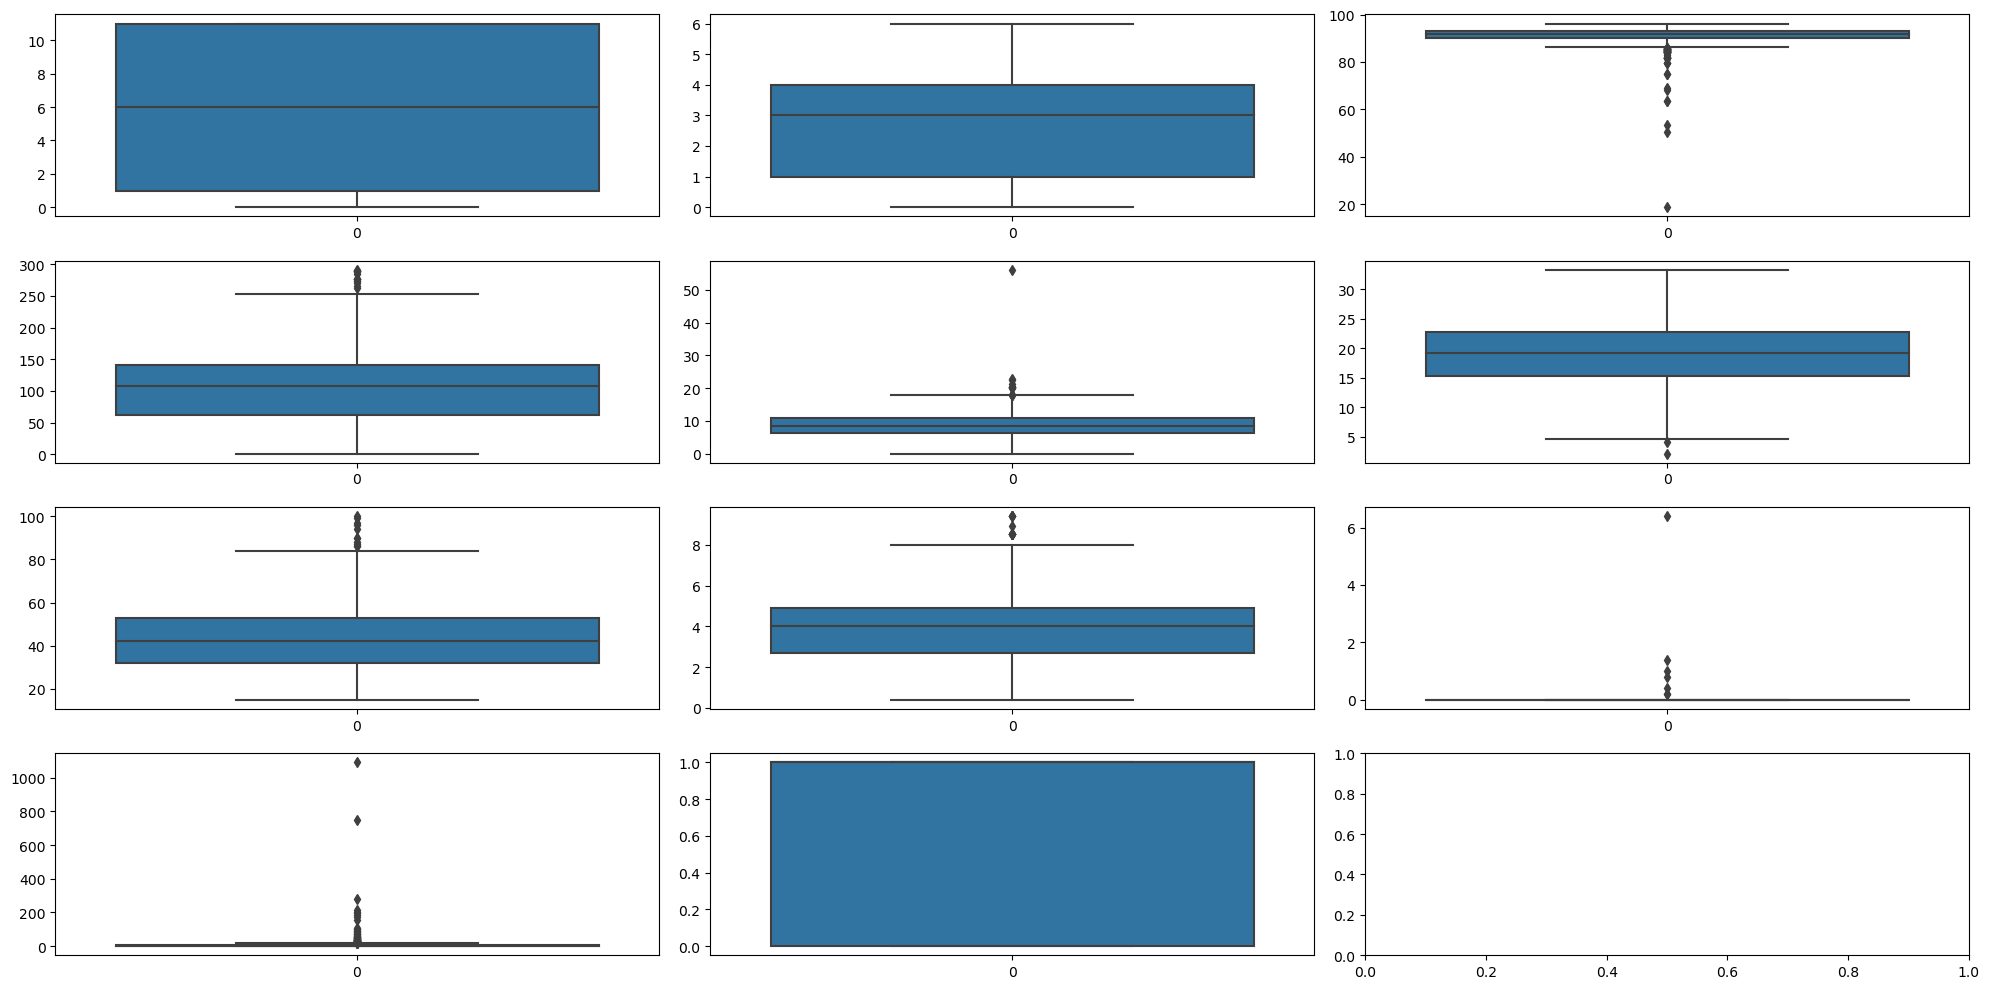

In [13]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.boxplot(forestfire2.month,ax=ax[0,0])
sns.boxplot(forestfire2.day,ax=ax[0,1])
sns.boxplot(forestfire2.FFMC,ax=ax[0,2])
sns.boxplot(forestfire2.DMC,ax=ax[1,0])
sns.boxplot(forestfire2.ISI,ax=ax[1,1])
sns.boxplot(forestfire2.temp,ax=ax[1,2])
sns.boxplot(forestfire2.RH,ax=ax[2,0])
sns.boxplot(forestfire2.wind,ax=ax[2,1])
sns.boxplot(forestfire2.rain,ax=ax[2,2])
sns.boxplot(forestfire2.area,ax=ax[3,0])
sns.boxplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()


## splitting the independent and target variables

In [16]:
x= forestfire2.iloc[:,:11]
y= forestfire2.iloc[:,-1]

# Constructing a Sequential neural network with

#### Input neurons: 11neurons
Hidden layer : 8 neurons Output layer: 1neuron

In [17]:
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

## Compiling Model with

### loss function: binary crossentropy

### optimizer:Adam

In [18]:
# Compiling Model with 
#loss function: binary crossentropy
#optimizer:Adam
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Fitting

In [19]:
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 3s 15ms/step - loss: 0.6051 - accuracy: 0.7390 - val_loss: 0.6953 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5631 - accuracy: 0.7566 - val_loss: 0.6488 - val_accuracy: 0.6726
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.7566 - val_loss: 0.6478 - val_accuracy: 0.6726
Epoch 4/150
35/35 [==============================] - 0s 5ms/step - loss: 0.5291 - accuracy: 0.7595 - val_loss: 0.6320 - val_accuracy: 0.6786
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.4972 - accuracy: 0.7625 - val_loss: 0.5769 - val_accuracy: 0.6905
Epoch 6/150
35/35 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.7801 - val_loss: 0.5898 - val_accuracy: 0.7143
Epoch 7/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8240 - val_loss: 0.5748 - val_accuracy: 0.7440
Epoch 8/150


## Model Evaluation

In [20]:
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9843
accuracy: 98.43%


In [21]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9702
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9583
Epoch 3/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1675 - val_accuracy: 0.9405
Epoch 4/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9583
Epoch 5/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9762
Epoch 6/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.9912 - val_loss: 0.2318 - val_accuracy: 0.9286
Epoch 7/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9464
Epoch 8/150
3

### List all the evaulation metric in built model (history)

In [23]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualization with model accuracy for train and test data

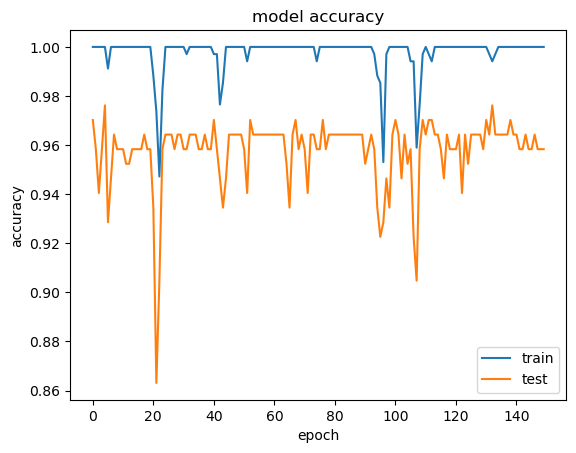

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Visualising the model history for the train and test loss

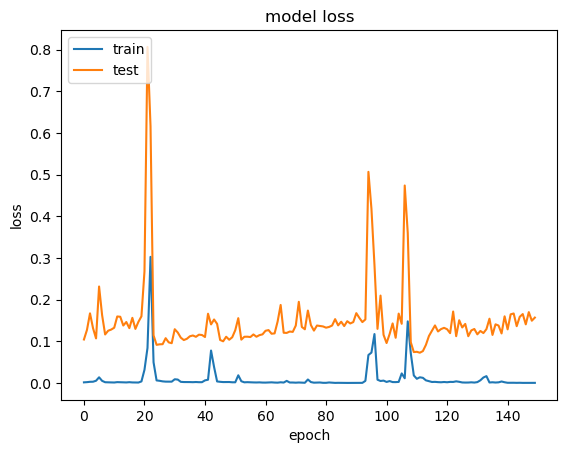

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()